<a href="https://colab.research.google.com/github/ewerton-andrade/DataScienceEvolution/blob/main/Desafio2(CRISP_DM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados do aluno**
# - **Aluno**: Ewerton Lima de Andrade
# - **email**: etonandrade@gmail.com
# - **acesse esse notebook colab no github**:
# - **Assunto**: "I2A2 - ABDI -Challenge 2"

******************

# **Objetivo**: Realizar as 3 primeiras fases do método CRISP-DM (business understanding, data understanding e data preparation) do desafio "Titanic" da plataforma Kaggle. Segue o link do desafio na plataforma: https://www.kaggle.com/competitions/titanic/overview


***

# **Resumo do problema do desafio Titanic**: O intuito da competição é usar machine learning para criar um modelo que prevê quais passageiros sobreviveram ao naufrágio do Titanic. Obs: Dado o objetivo deste desafio não é requisito obrigatório a submissão na competição da plataforma.

***

# **1- Primeira Fase: Business Understanding (Compreensão do negócio)** **bold text**

# Além do objetivo principal descrito no início desse trabalho, meu critério pessoal nesse desafio é tomar pelo menos uma ação em termos de pré-processamento dos dados para todas as features que possuem algum dado que precisa ser tratado, ou ainda até eliminado e/ou substituído. Dessa forma, passo agora à fase de "Data understanding".

# **2- Segunda Fase: Business Understanding (Compreensão dos dados)**

# **2.1 - Dicionário de Dados**

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition</th>
      <th>Key</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>survival</td>
      <td>Survival</td>
      <td>0 = No, 1 = Yes</td>
    </tr>
    <tr>
      <td>pclass</td>
      <td>Ticket class</td>
      <td>	1 = 1st, 2 = 2nd, 3 = 3rd</td>
    </tr>
    <tr>
      <td>sex</td>
      <td>Sex</td>
      <td></td>
    </tr>
    <tr>
      <td>Age</td>
      <td>Age in years</td>
      <td></td>
    </tr>
    <tr>
      <td>sibsp</td>
      <td># of siblings / spouses aboard the Titanic</td>
      <td></td>
    </tr>
    <tr>
      <td>parch</td>
      <td># of parents / children aboard the Titanic</td>
      <td></td>
    </tr>
    <tr>
      <td>ticket</td>
      <td>Ticket number</td>
      <td></td>
    </tr>
    <tr>
      <td>fare</td>
      <td>Passenger fare</td>
      <td></td>
    </tr>
    <tr>
      <td>cabin</td>
      <td>Cabin number</td>
      <td></td>
    </tr>
    <tr>
      <td>embarked</td>
      <td>Port of Embarkation</td>
      <td>C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table>

<h1>
<strong>Notas sobre as variáveis</strong>
</h1>

<p>
<strong>- pclass</strong>: A proxy for socio-economic status (SES)
<br>1st = Upper
<br>2nd = Middle
<br>3rd = Lower
</p>

<br>

<p>
<strong>- age:</strong> Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
</p>

<br>

<p>
<strong>- sibsp:</strong> The dataset defines family relations in this way...
<br>
Sibling = brother, sister, stepbrother, stepsister
<br>
Spouse = husband, wife (mistresses and fiancés were ignored)
</p>

<br>

<p>
<strong>- parch:</strong> The dataset defines family relations in this way...

<br>

Parent = mother, father

<br>

Child = daughter, son, stepdaughter, stepson

<br>

Some children travelled only with a nanny, therefore parch = 0 for them.
</p>


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

from google.colab import files

<h1>Carregando os dados</h1>

In [2]:
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
#Read and transform data into data frame
file_name = "train.csv"
df = pd.read_csv(file_name)

<h1>Vamos verificar se os dados foram carregados corretamente usando o comando head para visualizar as primeiras 10 linhas do dataframe.</h1>

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<h1>O próximo passo será verificar um resumo do dataframe usando o método info. </h1>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<h1>De acordo com as informações fornecidas acima, temos que:</h1>

<ul>
<li>891 registros;</li>
<li>12 colunas (features) distintas;</li>
<li>Valores faltantes nas colunas 'Age', 'Cabin' e 'Embarked';</li>
<li>Há 3 tipos de dados distintos no dataframe: ponto flutuante (float64), inteiros (int64) e texto ou mesclados (object).</li>
</ul>

<h1>Agora vou calcular o percentual de valores faltantes de cada feature:</h1>

In [6]:
# Calculate the percentage of 'NaN' values in each column
nan_percentage = (df.isna().mean() * 100).round(2)
print(nan_percentage)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64


<h1>
Agora veremos um resumo sobre a estatística das variáveis numéricas do dataframe usando método describe:
</h1>

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<h1>
Acima, apesar de algumas colunas serem numéricas (int ou float) algumas são na verdade variáveis qualitativas. Será necessário atuar nelas mais adiante.
</h1>

<h1>Vou checar a seguir se existe algum erro de semântica nas features, vou verificar um resumo dos valores únicos de cada feature do dataframe e verificar se há algum valor que está fora do padrão do dado da feature.</h1>

In [8]:
for column in df.columns:
  unique_values = df[column].unique()
  print(f"Unique values in column '{column}': {unique_values}")
  print(f"Unique values in column '{column}' count: {len(unique_values)}\n")


Unique values in column 'PassengerId': [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237

<h1>
Aqui vou verificar a frequência de cada valor dentro de cada feature:
</h1>

In [9]:
for column in df.columns:
  if column not in ['PassengerId', 'Name']:
    value_counts = df[column].value_counts()
    print(f"Value counts for column '{column}':\n{value_counts}\n")


Value counts for column 'Survived':
0    549
1    342
Name: Survived, dtype: int64

Value counts for column 'Pclass':
3    491
1    216
2    184
Name: Pclass, dtype: int64

Value counts for column 'Sex':
male      577
female    314
Name: Sex, dtype: int64

Value counts for column 'Age':
24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

Value counts for column 'SibSp':
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

Value counts for column 'Parch':
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Value counts for column 'Ticket':
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

Value counts for column 'Fare':
8.0500     43
13.0000    42
7.8958  

<h1>Os dados que saem do padrão do tipo de dado convencional da feature estão presentes em:</h1>



<ul>

<il><strong>- Idade</strong>: Há a presença de valores do tipo float como '0.92', obviamente esse tipo de valor deverá ser tratado dentro dessa feature. Vou padronizar os dados de idade como tipo inteiro e não do tipo float e analisar os casos em que será necessário tomar alguma ação em termos de substituição ou eliminação dos dados em outro(s) formatos. Outra ação voltada à essa feature é sua relação com respeito à variável target ('Survived') que é discreta. Nesse caso a ação que eu vou tomar é torná-la categórica criando 4 categorias
de idade por meio de intervalos definidos dessa forma:

<ul>A- Entre 0 a 11 anos será 'Crianca'; </ul>

<ul>B- Entre 12 a 19 anos será 'Adolescente'; </ul>

<ul>C- Entre 20 e 65 anos será 'Adulto'; </ul>

<ul>D- A partir dos 66 anos será 'Idoso';</ul>

</il>

<br>


<il><strong>- ticket</strong>: Não há indício de dados faltantes nessa feature conforme analizamos acima. Porém pela quantidade total de valores únicos (681) podemos inferir que alguns passageiros possuem o mesmo número de ticket e que como consequência os números de tickets não são únicos para cada passageiro. Além disso também é possível observar que não há um padrão específico de numeração, por exemplo, nesse caso temos 4 numerações distintas: 'PP 9549', '113783', 'A/5. 2151', 'LINE'. Talvez essa seja a feature que mais desafia o pré-processamento, vou deixar essa por último. Vou tentar verificar alguns padrões entre os valores. Nesse momento consigo pensar em algumas hipóteses para tentar verificar e/ou corrigir os valores de alguns tickets (caso haja): A-Inferência de valores que estão aparentemente incompletos por meio dos padrões da parte que inclui letras; B-Inferência de valores pela numeração dos bilhetes entre as pessoas do mesmo grupo, que aparentam ter o mesmo número de ticket; </il>


<br>

<il><strong>- Cabin:</strong> Ainda que fosse possível inferir os valores existentes dessa feature, há cerca de 77% de dados faltantes o que a torna desinteressante para a análise. Um dado interessante é que a parte da letra do valor do dado da cabine remete à classe do passageiro mas essa informação nós já temos em uma outra feature. Além disso uma parte dos valores existentes estão um pouco confusos havendo mais de uma letra ou ainda havendo alguns pares de cabines associados ao mesmo passageiro. Por essas razões eu vou desconsiderar o pré-processamento nessa feature. E provavelmente não a utilizaria em um possível modelo.</il>

</ul>



<h1>
Além das features acima citadas, algumas features possuem dados qualitativos porém estão em formato numérico. São elas: 'Survived', 'pclass', 'embarked'. Além dessas, após ter visto a frequência de distribuição dos dados de 'sibsp' e 'parch' eu vou categorizar de forma discreta cada variável de forma que se alguém possuir pelo menos um familiar receba a label '1' (um) e se não possui nenhum receba o valor da label como '0' (zero).
</h1>

<h1>
Agora vou verificar como estão os dados da nossa variável preditora:
</h1>

<Axes: >

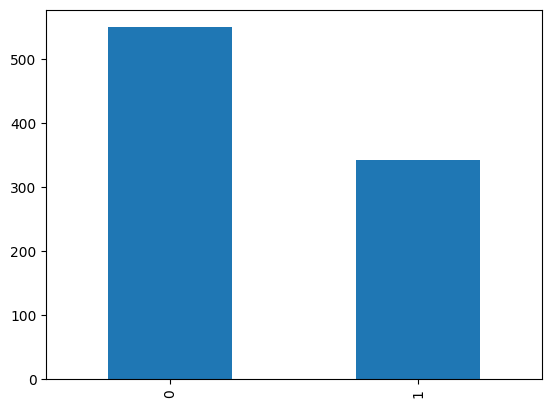

In [10]:
df['Survived'].value_counts().plot(kind='bar')

<h1>De acordo com o gráfico acima vemos que os dados da variável target estão desbalanceados. Uma outra medida de pré-processamento para esse caso de desbalanceamento é utilizar técnicas de reamostragem como: Subamostragem aleatória, sobreamostragem aleatória e sobreamostragem sintética sendo as duas primeiras técnicas citadas podendo ser utilizadas por meio dos métodos do próprio pandas 'sample()' e 'concat()'. Para a técnica de sobreamostragem sintética é possível utilizar uma biblioteca específica 'Imbalanced learn' utilizando a classe 'SMOTE'. Referência:
<a href="https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html">imbalanced-learn</a>
</h1>

<h1>Ações de pré-processamento dos dados por feature:</h1>

<il>
<ul><strong>1- survival:</strong> Transformar a feature em valores qualitativos que representam dois estados lógicos 'sobreviveu' e 'não sobreviveu';</ul>
<ul><strong>2- pclass:</strong>
 Transformar os dados da feature em dados categóricos representando cada classe do navio;</ul>
<ul><strong>3- Sex: </strong>Transformar em dados categóricos;</ul>
<ul><strong>4- Age: </strong> Padronizar a idade no tipo de dado inteiro (não float) e categorizar as idades por faixa etária criando 4 categorias
de idade por meio de intervalos definidos dessa forma:

<ul>A- Entre 0 a 11 anos será 'Crianca'; </ul>

<ul>B- Entre 12 a 19 anos será 'Adolescente'; </ul>

<ul>C- Entre 20 e 65 anos será 'Adulto'; </ul>

<ul>D- A partir dos 66 anos será 'Idoso';</ul></ul>

<ul><strong>5- sibsp:</strong> Tornar os dados dessa feature em categóricos de forma que se o passageiro possuir pelo menos um irmão, ou irmã, ou meio-irmão, ou meia-irmã ou cônjuge (amantes e noivas são excessão) na embarcação recebe uma label 'X' e se não tiver receberá '!X';</ul>
<ul><strong>6- parch:</strong>Tornar os dados dessa feature em categóricos de forma que se o passageiro possuir pelo menos ou mãe, ou pai, ou filhos, ou filhas, ou enteados, ou enteadas na embarcação recebe uma label 'X' e se não tiver receberá '!X';</ul>
<ul><strong>7- ticket:</strong> Essa feature possui uma série de dados pouco confiáveis dadas as fontes originais, por esse motivo eu decidi eliminar esse feature da análise;</ul>
<ul><strong>8- fare:</strong> Criar uma faixa de valores baseado em intervalos de taxa e classificar cada passageiro dentro de um intervalo;</ul>
<ul><strong>9- cabin:</strong> Nenhuma ação de pré-processamento devido ao excesso de dados faltantes.</ul>
<ul><strong>10- embarked:</strong> Categorização das variáveis dessa feature em 3 tipos: C, Q, S e input de dados no lugar dos dois dados faltantes da feature.</ul>
</il>

<h1>Antes de iniciar vou criar uma cópia do dataset original para poder manter a referência do dataframe.</h1>

In [11]:
df_pp = df.copy(deep=True)

<h1><strong>A- Pré-processando 'Survival' (Status de sobrevivente)</strong></h1>

<h1>Vou tornar a feature 'Survived' do tipo numérica para o tipo categórica utilizando o próprio pandas utilizando o comando a seguir:</h1>

In [12]:
df_pp['Survived'] = pd.Categorical(df['Survived'])
df_pp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


<h1>A mesma feature no dataframe original é do tipo (Dtype) 'int64':</h1>

In [13]:
df.Survived.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


<h1>Após a transformação da feature no dataframe pré-processado (df_pp) ela passa a ser do tipo (Dtype) 'category'</h1>

In [14]:
df_pp.Survived.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


# <h1><strong>B- Pré-processando 'pclass' (classe da acomodação)</strong></h1>

<h1>Vou tornar os dados dessa feature no tipo categórico:'</h1>

In [15]:
df_pp['Pclass'] = pd.Categorical(df_pp['Pclass'])
df_pp.Pclass.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


<h1>Aqui vemos o formato original do dado:</h1>

In [16]:
df.Pclass.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Pclass
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


<h1>Os dados estão assim distribuídos por label categórica dentro dessa feature</h1>

In [17]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<h1><strong>C- Pré-processando 'Sex' (Sexo do passageiro)</strong></h1>

<h1>Aqui vou tornar a feature 'Sex' no tipo categórica</h1>

In [18]:
df_pp['Sex'] = pd.Categorical(df_pp['Sex'])
df_pp.Sex.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


<h1>O dado original conforme podemos ver é do tipo (Dtype) 'object':</h1>

In [19]:
df.Sex.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Sex
Non-Null Count  Dtype 
--------------  ----- 
891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


<h1><strong>D- Pré-processando 'Age' (Idade do passageiro)</strong></h1>

<h1>Vou verificar o set de valores únicos dentro da feature 'Age':</h1>

In [20]:
df.Age.unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

<h1>Podemos ver alguns valores abaixo que possuem valor abaixo de 1:</h1>

In [21]:
print(df.loc[df['Age'] < 1, 'Age'])

78     0.83
305    0.92
469    0.75
644    0.75
755    0.67
803    0.42
831    0.83
Name: Age, dtype: float64


<h1>
Ações observadas:
<il>
<ul>- Vou arredondar para 1 os valores de idade abaixo de 1;</ul>

<ul>- Vou arredondar as estimativas de idade deixando apenas a parte inteira da estimativa.</ul>
</il>
</h1>

<h1>Arrendondando valores de idade menores que 1 para um 1:</h1>

In [22]:
df_pp.loc[df_pp['Age'] < 1, 'Age'] = 1

In [23]:
df_pp.Age.unique()

array([22. , 38. , 26. , 35. ,  nan, 54. ,  2. , 27. , 14. ,  4. , 58. ,
       20. , 39. , 55. , 31. , 34. , 15. , 28. ,  8. , 19. , 40. , 66. ,
       42. , 21. , 18. ,  3. ,  7. , 49. , 29. , 65. , 28.5,  5. , 11. ,
       45. , 17. , 32. , 16. , 25. ,  1. , 30. , 33. , 23. , 24. , 46. ,
       59. , 71. , 37. , 47. , 14.5, 70.5, 32.5, 12. ,  9. , 36.5, 51. ,
       55.5, 40.5, 44. , 61. , 56. , 50. , 36. , 45.5, 20.5, 62. , 41. ,
       52. , 63. , 23.5, 43. , 60. , 10. , 64. , 13. , 48. , 53. , 57. ,
       80. , 70. , 24.5,  6. , 30.5, 34.5, 74. ])

<h1>Após a transformação vamos checar se ainda existe algum valor abaixo de 1:</h1>

In [24]:
df_pp.loc[df_pp['Age'] < 1, 'Age']

Series([], Name: Age, dtype: float64)

<h1>A busca acima retornou um array vazio, isso significa que não foi encontrado nenhum valor abaixo de 1 dentro da feature.</h1>

<h1>Agora vou transformar as estimativas de idade (xx.5) deixando apenas a parte inteira da estimativa. Exemplo: Se a idade da pessoa for 28.5 após a transformação a sua idade deverá ser 28.0. Abaixo eu vou verificar quem são esses valores:</h1>

In [25]:
df_pp.loc[df['Age'].astype(str).str.endswith('.5'), 'Age']

57     28.5
111    14.5
116    70.5
122    32.5
123    32.5
148    36.5
152    55.5
153    40.5
203    45.5
227    20.5
296    23.5
331    45.5
525    40.5
676    24.5
735    28.5
767    30.5
814    30.5
843    34.5
Name: Age, dtype: float64

<h1>São ao todo:</h1>

In [26]:
print("Total de valores: ", len(df_pp.loc[df['Age'].astype(str).str.endswith('.5'), 'Age']))

Total de valores:  18


<h1>Realizando a transformação:</h1>

In [27]:
df_pp.loc[df['Age'].astype(str).str.endswith('.5'), 'Age'] -= 0.5

<h1>Vou checar se ainda existe algum valor que não seja inteiro dentre os valores existentes.</h1>

In [28]:
df_pp.loc[df['Age'].astype(str).str.endswith('.5'), 'Age']

57     28.0
111    14.0
116    70.0
122    32.0
123    32.0
148    36.0
152    55.0
153    40.0
203    45.0
227    20.0
296    23.0
331    45.0
525    40.0
676    24.0
735    28.0
767    30.0
814    30.0
843    34.0
Name: Age, dtype: float64

<h1>Vemos acima que os valores agora estão corretos. Vou verificar os valores únicos da feature novamente como checagem:</h1>

In [29]:
df_pp.Age.unique()

array([22., 38., 26., 35., nan, 54.,  2., 27., 14.,  4., 58., 20., 39.,
       55., 31., 34., 15., 28.,  8., 19., 40., 66., 42., 21., 18.,  3.,
        7., 49., 29., 65.,  5., 11., 45., 17., 32., 16., 25.,  1., 30.,
       33., 23., 24., 46., 59., 71., 37., 47., 70., 12.,  9., 36., 51.,
       44., 61., 56., 50., 62., 41., 52., 63., 43., 60., 10., 64., 13.,
       48., 53., 57., 80.,  6., 74.])

<h1>Vou verificar por meio de histograma a distribução da idade:</h1>

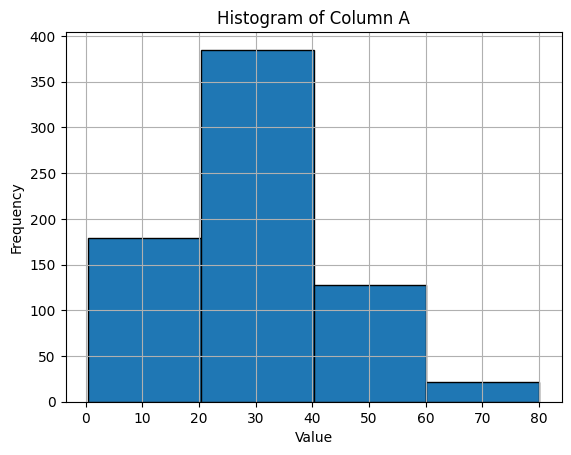

In [30]:
# Plot histogram for column 'A'
plt.hist(df['Age'], bins=4, edgecolor='black')  # Adjust number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column A')
plt.grid(True)
plt.show()

<h1>Acima, no gráfico, com excessão de alguns poucos valores a partir de 60 anos a distribuição lembra um pouco uma distribuição 'quase' normal. Abaixo vou verificar por meio do gráfico em format de boxplot se há algum(ns) outliers:</h1>

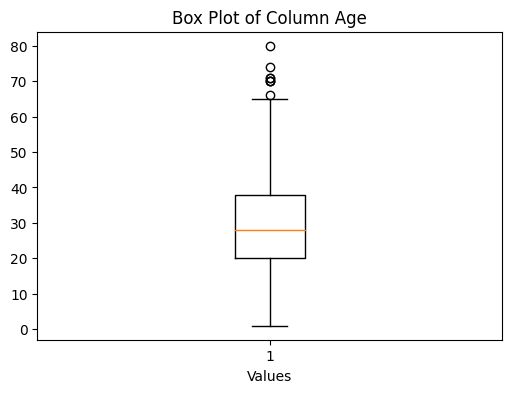

In [31]:
# Create a box plot for column 'A'
plt.figure(figsize=(6, 4))
plt.boxplot(df_pp.loc[~df['Age'].isna(), 'Age'], vert=True)
plt.xlabel('Values')
plt.title('Box Plot of Column Age')
plt.show()

<h1>Por meio do gráfico podemos considerar que há outliers em valores de idade que superam em torno dos 65 anos de idade. Com vi que a distribuição dos dados não está tão longe de ser normal  vou substituir os dados faltantes pelo valor da mediana:</h1>

In [32]:
df_pp.loc[df['Age'].isna(), 'Age'] = df_pp['Age'].median()

In [33]:
df_pp.Age.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


<h1>Agora que não há mais valores faltantes na feature de idade, vou substituir os valores nos ranges pelas categorias:</h1>

In [34]:
def convert_age_to_category(age):
  if 1 < age <= 11:
    return 'Crianca'
  elif 12 <= age <= 19:
    return 'Adolescente'
  elif 20 <= age <= 65:
    return 'Adulto'
  else:
    return 'Idoso'

df_pp['Age'] = df_pp['Age'].apply(convert_age_to_category)

In [35]:
df_pp.Age.value_counts()

Adulto         719
Adolescente     96
Crianca         54
Idoso           22
Name: Age, dtype: int64

<h1>Na atual condição o grupo de adultos está em um número muito maior do que as outras categorias de idade.</h1>

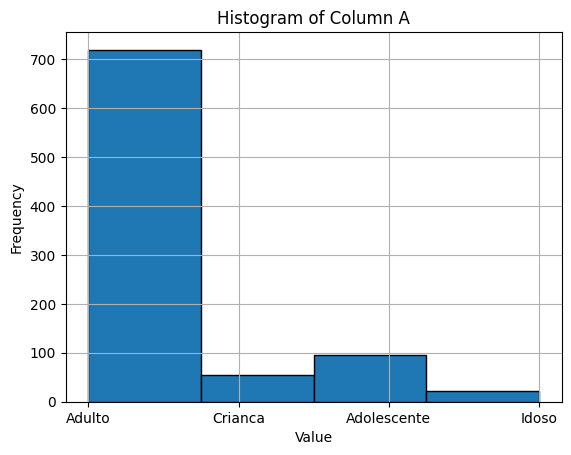

In [36]:
# Plot histogram for column 'A'
plt.hist(df_pp['Age'], bins=4, edgecolor='black')  # Adjust number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column A')
plt.grid(True)
plt.show()

<h1></h1>

<h1><strong>E- Pré-processando 'SibSP' (Número de irmãos e cônjuge)</strong></h1>

<h1>Agora vou substituir os valores de SibSP por valores categóricos:</h1>

In [37]:
df_pp.loc[df_pp['SibSp'] > 0, 'SibSp'] = 1

In [38]:
df_pp.SibSp.value_counts()

0    608
1    283
Name: SibSp, dtype: int64

In [39]:
df_pp['SibSp'] = pd.Categorical(df_pp['SibSp'])

In [40]:
df_pp['SibSp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: SibSp
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


<h1><strong>F- Pré-processando 'Parch' (Número de parentes ascendentes ou descedentes)</strong></h1>

In [41]:
df_pp.loc[df_pp['Parch'] > 0, 'Parch'] = 1

In [42]:
df_pp.Parch.value_counts()

0    678
1    213
Name: Parch, dtype: int64

In [43]:
df_pp['Parch'] = pd.Categorical(df_pp['Parch'])

In [44]:
df_pp.Parch.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Parch
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


<h1><strong>G- Pré-processando 'Ticket' (Númeração do Bilhete da passagem)</strong></h1>

<h1>Decidi eliminar essa feature da análise</h1>

In [45]:
df_pp.drop('Ticket', axis=1, inplace=True)

<h1><strong>H- Pré-processando 'Fare' (Taxa paga pelo passageiro)</strong></h1>

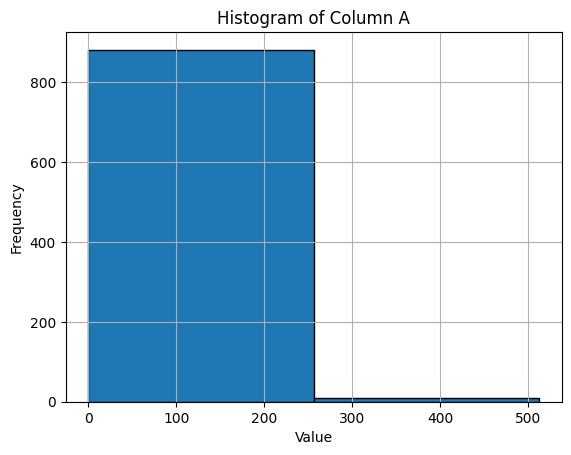

In [46]:
# Plot histogram for column 'A'
plt.hist(df_pp['Fare'], bins=2, edgecolor='black')  # Adjust number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Column A')
plt.grid(True)
plt.show()

In [47]:
df_pp.Fare.value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: Fare, Length: 248, dtype: int64

In [48]:
def convert_fare_to_category(fare):
  if 0 < fare <= 99:
    return 1
  elif 100 <= fare <= 199:
    return 2
  elif 200 <= fare <= 299:
    return 3
  else:
    return 4

df_pp['Fare'] = df_pp['Fare'].apply(convert_fare_to_category)

In [49]:
df_pp.Fare.value_counts()

1    823
2     33
4     18
3     17
Name: Fare, dtype: int64

<h1><strong>I- Pré-processando 'Cabin' (Identificação da cabine)</strong></h1>

In [50]:
df_pp.drop('Cabin', axis=1, inplace=True)

<h1><strong>J- Pré-processando 'Embarked' (Local do porto de embarque no navio)</strong></h1>

In [51]:
df_pp.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

<h1>Acima vemos que a maior concentração de pessoas embarcou no porto 'S' dessa forma, pelo fato de possuir apenas 2 valores faltantes eu vou substituir por 'S'.</h1>

In [52]:
# Replace NaN values in feature 'A' with the median
df_pp['Embarked'].fillna('S', inplace=True)

In [53]:
df_pp['Embarked'] = pd.Categorical(df_pp['Embarked'])

In [54]:
df_pp.Embarked.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


<h1>Finalizo aqui o trabalho proposto tendo cumprido o meu objetivo principal de poder tomar pelo menos uma ação relacionado à pré-processamento em cada uma das features do dataset do Titanic.</h1>